In [95]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [96]:
listing_data=pd.read_csv('/Users/yezhibin/Downloads/比赛/天池短租/listings.csv',index_col=0)
listing_data.shape

(28452, 15)

In [97]:
listing_data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
44054,Modern and Comfortable Living in CBD,192875,East Apartments,NaN,朝阳区 / Chaoyang,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341
100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,NaN,密云县 / Miyun,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,0
128496,Heart of Beijing: House with View 2,467520,Cindy,NaN,东城区,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93
161902,cozy studio in center of Beijing,707535,Robert,NaN,东城区,39.93357,116.43577,Entire home/apt,376,1,26,2016-12-03,0.28,5,290
162144,"nice studio near subway, sleep 4",707535,Robert,NaN,朝阳区 / Chaoyang,39.93668,116.43798,Entire home/apt,537,1,37,2018-08-01,0.40,5,352


In [98]:
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28452 entries, 44054 to 33954414
Data columns (total 15 columns):
name                              28451 non-null object
host_id                           28452 non-null int64
host_name                         28452 non-null object
neighbourhood_group               0 non-null float64
neighbourhood                     28452 non-null object
latitude                          28452 non-null float64
longitude                         28452 non-null float64
room_type                         28452 non-null object
price                             28452 non-null int64
minimum_nights                    28452 non-null int64
number_of_reviews                 28452 non-null int64
last_review                       17294 non-null object
reviews_per_month                 17294 non-null float64
calculated_host_listings_count    28452 non-null int64
availability_365                  28452 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usa

In [99]:
df=listing_data.drop('neighbourhood_group',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28452 entries, 44054 to 33954414
Data columns (total 14 columns):
name                              28451 non-null object
host_id                           28452 non-null int64
host_name                         28452 non-null object
neighbourhood                     28452 non-null object
latitude                          28452 non-null float64
longitude                         28452 non-null float64
room_type                         28452 non-null object
price                             28452 non-null int64
minimum_nights                    28452 non-null int64
number_of_reviews                 28452 non-null int64
last_review                       17294 non-null object
reviews_per_month                 17294 non-null float64
calculated_host_listings_count    28452 non-null int64
availability_365                  28452 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 3.3+ MB


In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,28452.0,1.442821e+08,7.057051e+07,192875.00000,8.708958e+07,1.525464e+08,2.061464e+08,2.563498e+08
latitude,28452.0,3.998323e+01,1.869841e-01,39.45581,3.989733e+01,3.993090e+01,3.999047e+01,4.094966e+01
longitude,28452.0,1.164420e+02,2.047957e-01,115.47339,1.163553e+02,1.164347e+02,1.164911e+02,1.174953e+02
price,28452.0,6.112033e+02,1.623535e+03,0.00000,2.350000e+02,3.890000e+02,5.770000e+02,6.898300e+04
minimum_nights,28452.0,2.729685e+00,1.792093e+01,1.00000,1.000000e+00,1.000000e+00,1.000000e+00,1.125000e+03
number_of_reviews,28452.0,7.103156e+00,1.681507e+01,0.00000,0.000000e+00,1.000000e+00,6.000000e+00,3.220000e+02
reviews_per_month,17294.0,1.319757e+00,1.581243e+00,0.01000,2.900000e-01,8.000000e-01,1.750000e+00,2.000000e+01
calculated_host_listings_count,28452.0,1.281829e+01,2.926132e+01,1.00000,2.000000e+00,5.000000e+00,1.100000e+01,2.220000e+02
availability_365,28452.0,2.203421e+02,1.384307e+02,0.00000,8.700000e+01,2.090000e+02,3.610000e+02,3.650000e+02


[Text(0, 0.5, 'Number_of_reviews'),
 Text(0.5, 0, 'Price'),
 Text(0.5, 1.0, 'relationship of price and number_of_reviews')]

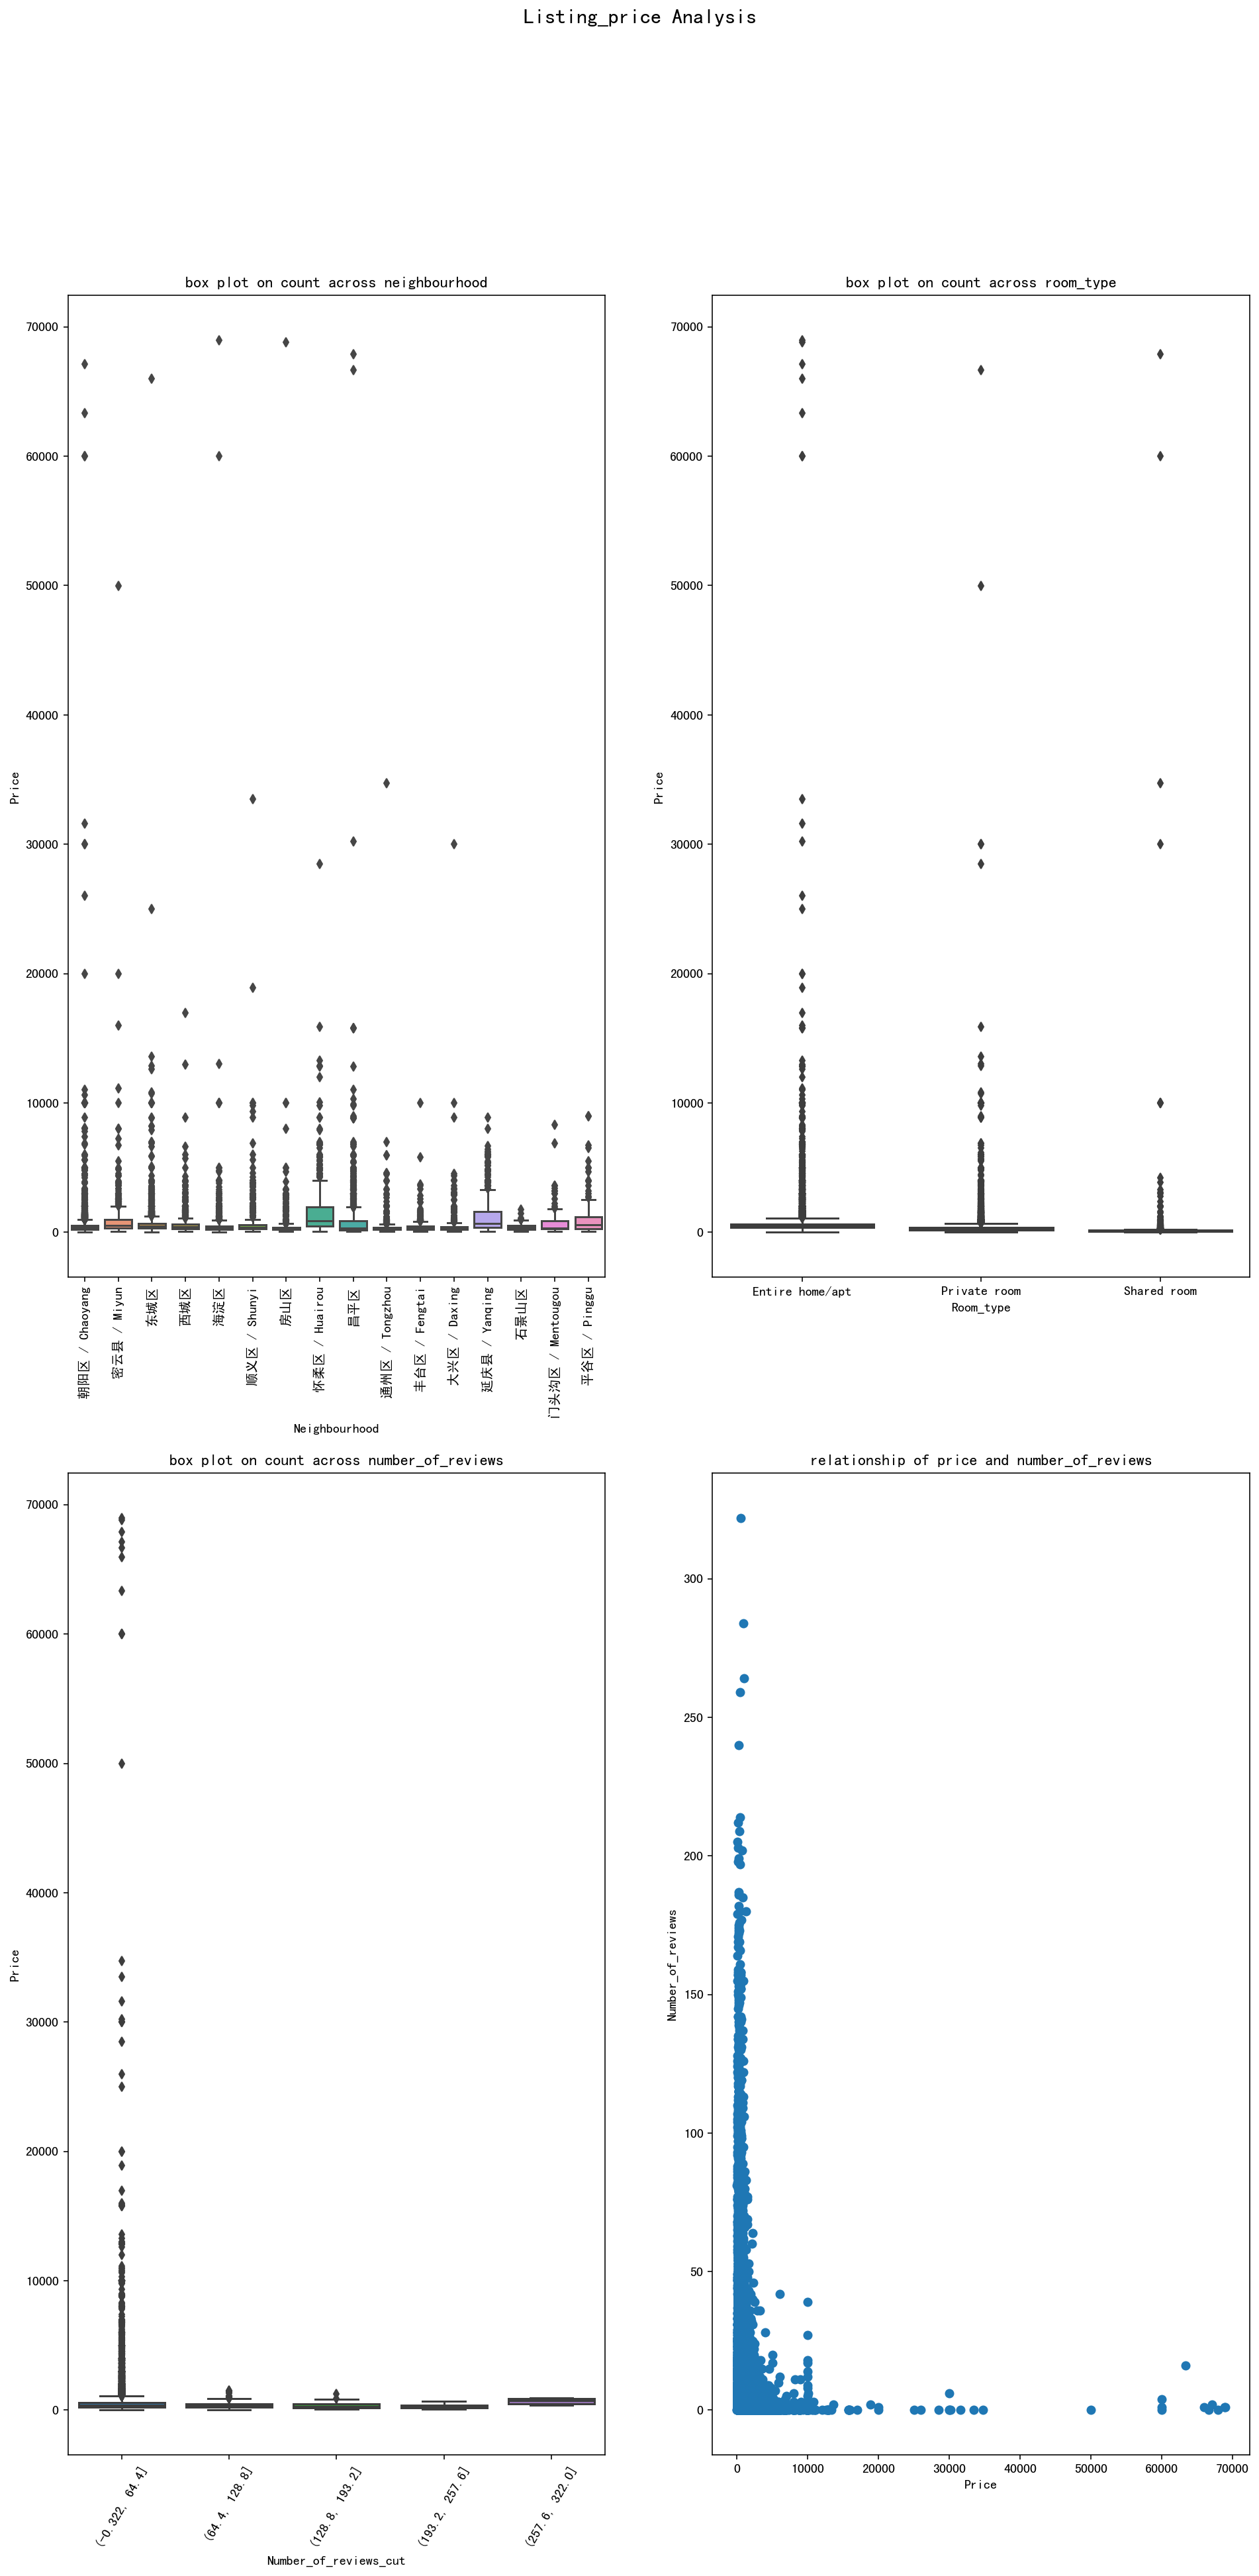

In [101]:
fig=plt.figure(figsize=(16,30))
fig.suptitle('Listing_price Analysis',fontsize=16)
#添加第一个子图
ax1=fig.add_subplot(2,2,1)
sns.boxplot(data=df,x='neighbourhood',y='price')
ax1.set(xlabel='Neighbourhood',ylabel='Price',title='box plot on count across neighbourhood')
plt.xticks(rotation=90)

#添加第二个图
ax2=fig.add_subplot(2,2,2)
sns.boxplot(data=df,x='room_type',y='price')
ax2.set(xlabel='Room_type',ylabel='Price',title='box plot on count across room_type')

#添加第三个图,评论数与短租价格的关系
df['number_of_reviews_cut']=pd.cut(df.number_of_reviews,5)
ax3=fig.add_subplot(2,2,3)
sns.boxplot(data=df,x='number_of_reviews_cut',y='price')
ax3.set(xlabel='Number_of_reviews_cut',ylabel='Price',title='box plot on count across number_of_reviews')
plt.xticks(rotation=60)

#添加第四个图，评论数与短租价格的关系
ax4=fig.add_subplot(2,2,4)
ax4.scatter(x=df.price,y=df.number_of_reviews)
ax4.set(ylabel='Number_of_reviews',xlabel='Price',title='relationship of price and number_of_reviews')


由上述视图化分析可知， 短租价格（≥50000）异常高的，主要集中在朝阳区、密云县、东城区、海淀区、房山区和昌平区，石景山区的短租价格整体来说相对较低；高价短租的房间类型偏向于Entire home 和Private room；短租价格越低，评论数越多，说明了大部分受众偏好于价格低的短租房。

# 区域位置与房源数目的关系

In [102]:
neg_count=df.groupby(['neighbourhood','room_type'])['room_type'].count()
neg_count

neighbourhood     room_type      
东城区               Entire home/apt    2320
                  Private room        891
                  Shared room         135
丰台区 / Fengtai     Entire home/apt    1177
                  Private room        456
                  Shared room         125
大兴区 / Daxing      Entire home/apt     540
                  Private room        258
                  Shared room          25
密云县 / Miyun       Entire home/apt     496
                  Private room        434
                  Shared room           5
平谷区 / Pinggu      Entire home/apt      85
                  Private room         55
                  Shared room           3
延庆县 / Yanqing     Entire home/apt     368
                  Private room        347
                  Shared room           3
怀柔区 / Huairou     Entire home/apt     403
                  Private room        420
                  Shared room          10
房山区               Entire home/apt     358
                  Private room        212


In [103]:
neg_count.unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
东城区,2320,891,135
丰台区 / Fengtai,1177,456,125
大兴区 / Daxing,540,258,25
密云县 / Miyun,496,434,5
平谷区 / Pinggu,85,55,3
延庆县 / Yanqing,368,347,3
怀柔区 / Huairou,403,420,10
房山区,358,212,9
昌平区,534,459,41


In [104]:
df.pivot_table('number_of_reviews',index='neighbourhood',columns='room_type')

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
东城区,12.736638,18.832772,12.251852
丰台区 / Fengtai,4.608326,8.155702,2.592000
大兴区 / Daxing,3.794444,3.755814,3.280000
密云县 / Miyun,3.322581,1.082949,0.600000
平谷区 / Pinggu,2.282353,0.672727,1.000000
延庆县 / Yanqing,1.247283,0.484150,0.000000
怀柔区 / Huairou,2.384615,1.476190,0.100000
房山区,3.536313,1.056604,0.444444
昌平区,2.301498,3.013072,2.146341


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

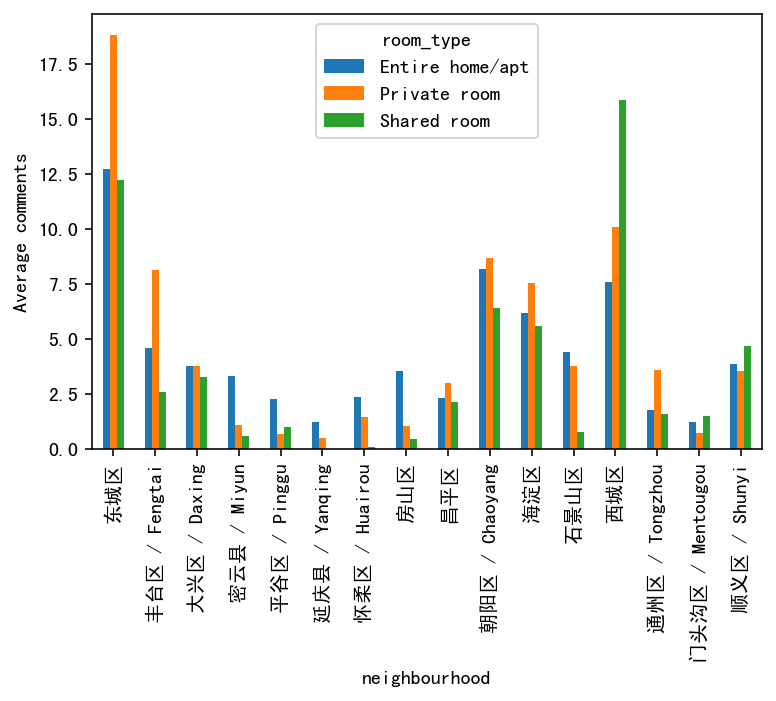

In [105]:
fig_reviews=df.pivot_table('number_of_reviews',index='neighbourhood',columns='room_type').plot.bar()
fig_reviews.set(ylabel='Average comments',xlabel='neighbourhood')
plt.xticks(rotation=90)


# 数据挖掘

In [106]:
df['room_type_factorize']=pd.factorize(df['room_type'])[0]
#使用pd.get_dummies()处理数据room_type
room_type_dummies=pd.get_dummies(df['room_type'],prefix='roomtype')
df2=pd.concat([df,room_type_dummies],axis=1)
df2.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_cut,room_type_factorize,roomtype_Entire home/apt,roomtype_Private room,roomtype_Shared room
id,,,,,,,,,,,,,,,,,,,
44054,Modern and Comfortable Living in CBD,192875,East Apartments,朝阳区 / Chaoyang,39.89503,116.45163,Entire home/apt,792,1,89,2019-03-04,0.85,9,341,"(64.4, 128.8]",0,1,0,0
100213,The Great Wall Box Deluxe Suite A团园长城小院东院套房,527062,Joe,密云县 / Miyun,40.68434,117.17231,Private room,1201,1,2,2017-10-08,0.10,4,0,"(-0.322, 64.4]",1,0,1,0
128496,Heart of Beijing: House with View 2,467520,Cindy,东城区,39.93213,116.42200,Entire home/apt,389,3,259,2019-02-05,2.70,1,93,"(257.6, 322.0]",0,1,0,0
161902,cozy studio in center of Beijing,707535,Robert,东城区,39.93357,116.43577,Entire home/apt,376,1,26,2016-12-03,0.28,5,290,"(-0.322, 64.4]",0,1,0,0
162144,"nice studio near subway, sleep 4",707535,Robert,朝阳区 / Chaoyang,39.93668,116.43798,Entire home/apt,537,1,37,2018-08-01,0.40,5,352,"(-0.322, 64.4]",0,1,0,0


In [107]:
df2['neighbourhood_factorize']=pd.factorize(df['neighbourhood'])[0]

In [108]:
reviews_df2_train=df2.loc[(df2['reviews_per_month'].notnull())]
correlation=reviews_df2_train.corr()
correlation

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_factorize,roomtype_Entire home/apt,roomtype_Private room,roomtype_Shared room,neighbourhood_factorize
host_id,1.000000,0.007254,0.003816,0.007889,-0.013748,-0.274031,0.061976,-0.059051,0.051527,-0.136404,0.158538,-0.155083,-0.018483,0.135229
latitude,0.007254,1.000000,0.410631,0.084636,-0.008551,-0.069384,-0.091474,-0.044322,0.003785,0.016973,-0.034532,0.049929,-0.029396,0.044326
longitude,0.003816,0.410631,1.000000,0.001708,-0.006537,-0.011440,-0.023611,-0.022288,-0.012195,-0.017027,0.016752,-0.013072,-0.008812,-0.259693
price,0.007889,0.084636,0.001708,1.000000,0.020756,-0.033211,-0.046072,0.004996,0.027672,-0.115122,0.117803,-0.097782,-0.049853,0.024586
minimum_nights,-0.013748,-0.008551,-0.006537,0.020756,1.000000,-0.012425,-0.024490,-0.013641,-0.013035,0.005632,-0.001169,-0.004723,0.012276,-0.012818
number_of_reviews,-0.274031,-0.069384,-0.011440,-0.033211,-0.012425,1.000000,0.488320,-0.069652,-0.110343,0.035333,-0.045355,0.049044,-0.004393,-0.126189
reviews_per_month,0.061976,-0.091474,-0.023611,-0.046072,-0.024490,0.488320,1.000000,-0.088477,-0.147776,-0.055756,0.047238,-0.027048,-0.045161,-0.122757
calculated_host_listings_count,-0.059051,-0.044322,-0.022288,0.004996,-0.013641,-0.069652,-0.088477,1.000000,0.190994,-0.053561,0.052789,-0.041316,-0.027517,-0.011620
availability_365,0.051527,0.003785,-0.012195,0.027672,-0.013035,-0.110343,-0.147776,0.190994,1.000000,-0.079240,0.103333,-0.113337,0.013317,0.081483
room_type_factorize,-0.136404,0.016973,-0.017027,-0.115122,0.005632,0.035333,-0.055756,-0.053561,-0.079240,1.000000,-0.931751,0.659984,0.629028,-0.058412


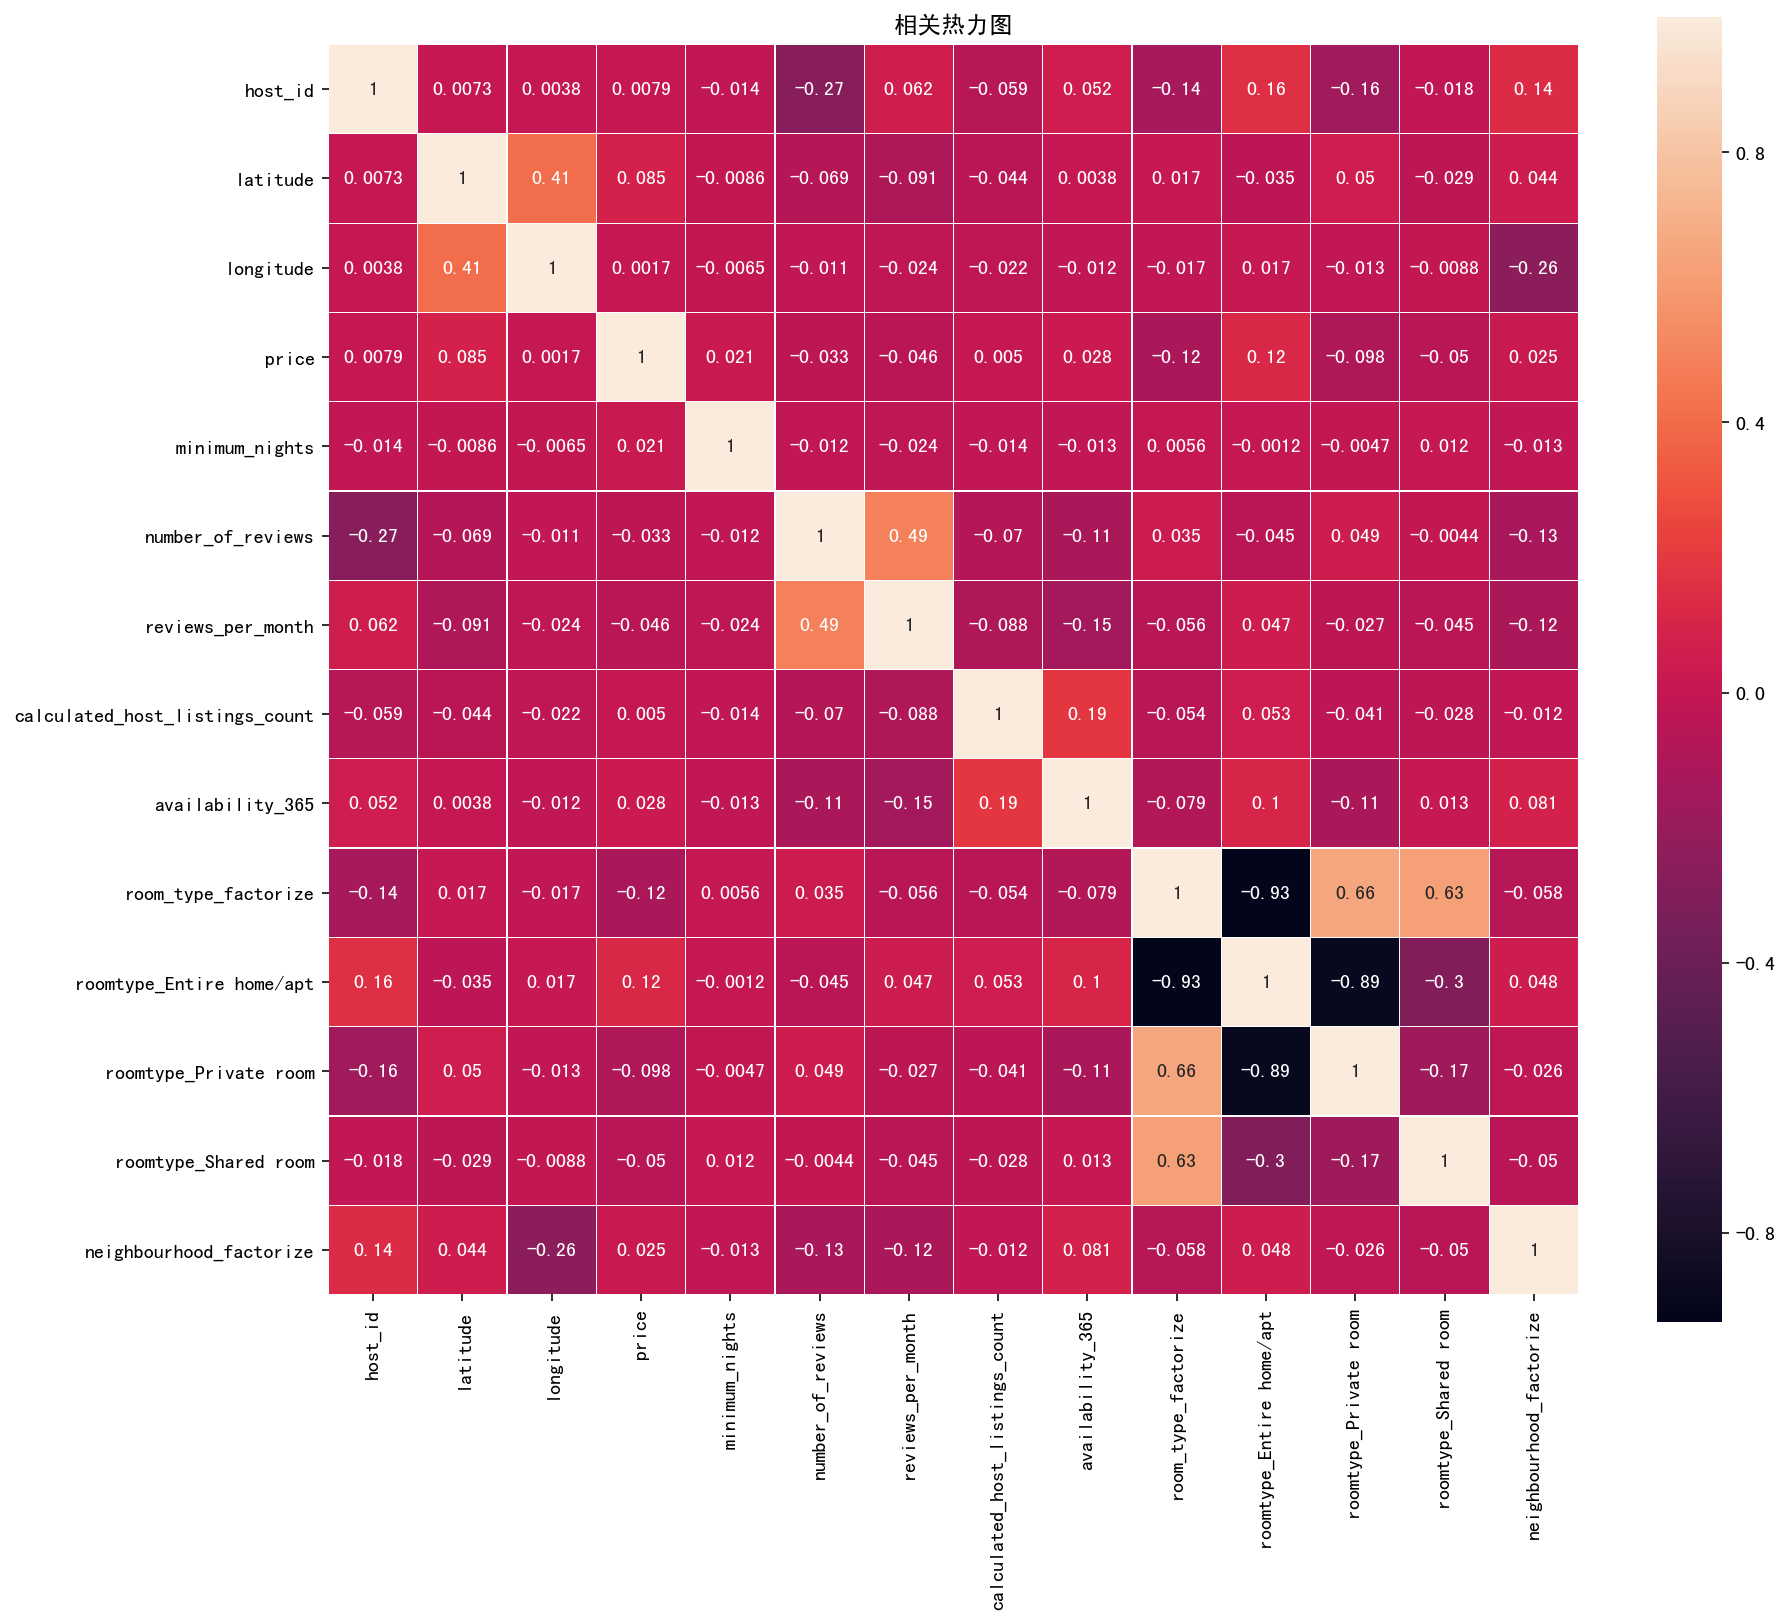

In [109]:
plt.subplots(figsize=(14,12))
sns.heatmap(correlation,annot=True,linewidths=0.1,vmax=1,square=True)
plt.title('相关热力图')
plt.show()

In [110]:
#弃掉无用特征
df3=df2.drop(['name','host_id','host_name','neighbourhood','number_of_reviews_cut',
              'last_review','roomtype_Entire home/apt','room_type','roomtype_Private room',
              'roomtype_Shared room',],axis=1)
df3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28452 entries, 44054 to 33954414
Data columns (total 10 columns):
latitude                          28452 non-null float64
longitude                         28452 non-null float64
price                             28452 non-null int64
minimum_nights                    28452 non-null int64
number_of_reviews                 28452 non-null int64
reviews_per_month                 17294 non-null float64
calculated_host_listings_count    28452 non-null int64
availability_365                  28452 non-null int64
room_type_factorize               28452 non-null int64
neighbourhood_factorize           28452 non-null int64
dtypes: float64(3), int64(7)
memory usage: 3.6 MB


In [111]:
#数据标准化
from sklearn import preprocessing
scaler=preprocessing.StandardScaler().fit(df3[['latitude','longitude','price','availability_365']])
df3[['latitude','longitude','price','availability_365']]=scaler.transform(df3[['latitude','longitude','price','availability_365']])
df3.head()



,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_factorize,neighbourhood_factorize
id,,,,,,,,,,
44054,-0.471681,0.047022,0.111362,1,89,0.85,9,0.871628,0,0
100213,3.749662,3.566102,0.363286,1,2,0.10,4,-1.591743,1,1
128496,-0.273265,-0.097661,-0.136866,3,259,2.70,1,-0.919914,0,2
161902,-0.265564,-0.030422,-0.144874,1,26,0.28,5,0.503206,0,2
162144,-0.248931,-0.019631,-0.045706,1,37,0.40,5,0.951091,0,0


In [112]:
#以reviews_per_month为目标值，将reviews_per_month完整的项作为训练集，缺失的作为测试集
reviews_df3_train=df3.loc[(df2['reviews_per_month'].notnull())]
reviews_df3_test=df3.loc[(df2['reviews_per_month'].isnull())]

In [113]:
#建立reviews_per_month的预测模型，可以多模型预测，在做模型融合，提高预测的精度
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

X_train=reviews_df3_train.drop(['reviews_per_month'],axis=1)
#Y_train=reviews_df3_train(['reviews_per_month'])
Y_train=reviews_df3_train['reviews_per_month']
X_test=reviews_df3_test.drop(['reviews_per_month'],axis=1)

    #model 1 gbr
model_gbr=GradientBoostingRegressor(random_state=0)
model_gbr_param_grid={'n_estimators':[100],'max_depth':[11],'learning_rate':[0.1]}
#model_gbr_grid=model_seletion.GridSearchCV(model_gbr,model_gbr_param_grid,cv=10,n_jobs=-1,verbose=1)
model_gbr_grid=model_selection.GridSearchCV(model_gbr,model_gbr_param_grid,cv=10,n_jobs=-1,verbose=1)
model_gbr_grid.fit(X_train,Y_train)
print('Best Params:'+str(model_gbr_grid.best_params_))
print('Best Score:'+str(model_gbr_grid.best_score_))
print('Train Score:'+str(model_gbr_grid.score(X_train,Y_train)))
y_gbr_test=model_gbr_grid.predict(X_test)
print(Y_gbr_test[:4])


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.2min finished


Best Params:{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 100}
Best Score:0.14709553173595086
Train Score:0.9533975090332623


NameError: name 'Y_gbr_test' is not defined

In [114]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
def predict_missing_riews(reviews_df3_train,reviews_df3_test):
    X_train=reviews_df3_train.drop(['reviews_per_month'], axis=1)
    Y_train=reviews_df3_train['reviews_per_month']
    X_test=reviews_df3_test.drop(['reviews_per_month'], axis=1)
    
    #model 1 gbr
    model_gbr=GradientBoostingRegressor(random_state=0)
    model_gbr_param_grid={'n_estimators':[100],'max_depth':[11],'learning_rate':[0.01,0.1]}
    model_gbr_grid=model_selection.GridSearchCV(model_gbr,model_gbr_param_grid,cv=10,n_jobs=-1,verbose=1)
    model_gbr_grid.fit( X_train,Y_train)
    print('Best Params:' +str(model_gbr_grid.best_params_))
    print('Best Score:' +str(model_gbr_grid.best_score_))
    print('Train Score:' +str(model_gbr_grid.score(X_train,Y_train)))
    Y_gbr_test=model_gbr_grid.predict(X_test)
    print(Y_gbr_test[:4])
   
    # model 2 rfr
    model_rfr=RandomForestRegressor(random_state=0)
    model_rfr_param_grid={'n_estimators':[100],'max_depth':[11]}
    model_rfr_grid=model_selection.GridSearchCV(model_rfr,model_rfr_param_grid,cv=10,n_jobs=-1,verbose=1)
    model_rfr_grid.fit(X_train,Y_train)
    print('Best Params:' +str(model_rfr_grid.best_params_))
    print('Best Score:' +str(model_rfr_grid.best_score_))
    print('Train Score:' +str(model_rfr_grid.score(X_train,Y_train)))
    Y_rfr_test=model_rfr_grid.predict(X_test)
    print(Y_rfr_test[:4])
    
    # 模型融合
    Y_test=np.mean([Y_gbr_test,Y_rfr_test],axis=0)
    Y_test=pd.Series(Y_test)
    Y_test=Y_test.map(lambda x: '%.2f' % x)
    Y_test=np.array(Y_test)
    reviews_df3_test['reviews_per_month']=Y_test
    
    return  reviews_df3_test 

In [115]:
reviews_df3_test=predict_missing_riews(reviews_df3_train,reviews_df3_test)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.7min finished


Best Params:{'learning_rate': 0.01, 'max_depth': 11, 'n_estimators': 100}
Best Score:0.23874907141632856
Train Score:0.5678784140756807
[0.86542507 0.85716372 0.63168701 0.64322715]
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   24.6s finished


Best Params:{'max_depth': 11, 'n_estimators': 100}
Best Score:0.22284144124160693
Train Score:0.6188106424819679
[0.37684242 0.57203359 0.23754578 0.27267469]


/Users/yezhibin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
#建立reviews_per_month的预测模型，可以多模型预测，在做模型融合，提高预测的精度
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
def predict_missing_riews(reviews_df3_train,reviews_df3_test):
    X_train=reviews_df3_train.drop(['reviews_per_month'],axis=1)
    Y_train=reviews_df3_train['reviews_per_month']
    X_test=reviews_df3_test.drop(['reviews_per_month'],axis=1)
    
#model 1 gbr
    model_gbr=GradientBoostingRegressor(random_state=0)
    model_gbr_param_grid={'n_estimators':[2000],'max_depth':[11],'learning_rate':[0.01,0.1]}
    model_gbr_grid=model_seletion.GridSearchCV(model_gbr,model_gbr_param_grid,cv=10,n_jobs=-1,verbose=1)
    model_gbr_grid.fit(X_train,Y_train)
    print('Best Params:'+str(model_gbr_grid.best_params_))
    print('Best Score:'+str(model_gbr_grid.best_score_))
    print('Train Score:'+str(model_gbr_grid.score(X_train,Y_train)))
    y_gbr_test=model_gbr_grid.predict(X_test)
    print(Y_gbr_test[:4])
    
    #modle 2 rfr
    model_rfr=RandomForestRegressor(random_state=0)
    model_rfr_param_grid={'n_estimators':[200],'max_depth':[11]}
    model_rfr_grid=model.selection.GridSearchCV(model_rfr,model_rfr_param_grid,cv=10,n_jobs=-1,verbose=1)
    model_rfr_grid.fit(X_train,Y_train)
    print('Best Params:'+str(model_rfr_grid.best_params_))
    print('Best Score:'+str(model_rfr_grid.best_score_))
    print('Train Score:'+str(model_rfr_grid.score(X_train,Y_train)))
    y_rfr_test=model_rfr_grid.predict(X_test)
    print(Y_rfr_test[:4])
    
    #模型融合
    Y_test=np.mean([Y_gbr_test,Y_rfr_test],axis=0)
    Y_test=pd.Series(Y_test)
    Y_test=Y_test.map(lambda x: '%.2f' %x)
    Y_test=np.array(Y_test)
    reviews_df3_test['reviews_per_month']=Y_test
    
    return  reviews_df3_test 

